In [2]:
%matplotlib qt

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import json
from sklearn import preprocessing
from networkx.readwrite import json_graph

In [9]:
def read_json_file(filename):
    with open(filename,  "r", encoding="utf8") as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph, directed=False, multigraph=True), js_graph

G,data = read_json_file("MC3/MC3.json")
G.is_directed(), G.is_multigraph()

(True, True)

In [10]:
G = G.to_undirected()

print(G.is_directed(), G.is_multigraph())

G.number_of_edges(), G.number_of_nodes()

False True


(24038, 52170)

#### To Pandas DF 

In [11]:
def safe_convert(x):
    try:
        return x[0]
    except:
        return ""

In [18]:
df = pd.DataFrame(data["nodes"])

df.id = df.id.apply(lambda x:x[0])
df.country = df.country.apply(lambda x:x[0])
df.product_services = df.product_services.apply(safe_convert)
df.revenue_omu = df.revenue_omu.apply(safe_convert)
df.type = df.type.apply(safe_convert)

nodes = df.id.values.tolist()

len(nodes), len(set(nodes))#counting without duplicate

(27622, 22929)

In [19]:
df

,country,id,product_services,revenue_omu,type
0,ZH,Jones LLC,Automobiles,310612303.447,Company
1,ZH,"Coleman, Hall and Lopez","Passenger cars, trucks, vans, and buses",162734683.9969,Company
2,Oceanus,Aqua Advancements Sashimi SE Express,Holding firm whose subsidiaries are engaged in...,115004666.6728,Company
3,Utoporiana,Makumba Ltd. Liability Co,"Car service, car parts and accessories, automo...",90986412.5191,Company
4,ZH,"Taylor, Taylor and Farrell",Fully electric vehicles (EVs) and electric veh...,81466666.6728,Company
...,...,...,...,...,...
27617,ZH,"Johnson, Lee and Rodriguez",,,Company Contacts
27618,ZH,"Bowman, Rollins and Griffin",,,Company Contacts
27619,ZH,Hardin Group,,,Company Contacts
27620,ZH,"Crane, Joyce and Jennings",,,Company Contacts


In [21]:
df1 = pd.DataFrame(data["links"])

df1.source = df1.source.apply(lambda x: x[0])
df1.target = df1.target.apply(lambda x: x[0])
df1.type = df1.type.apply(lambda x: x[0])

##all nodes from source and target
nodes_edges = df1.source.values.tolist() + df1.target.values.tolist()

len(nodes_edges), len(set(nodes_edges))#counting without duplicate

(48076, 34062)

In [22]:
df1

,source,target,type
0,Lake Chad Catchers Limited Liability Company ...,Erin Flores,Beneficial Owner
1,Lake Chad Catchers Limited Liability Company ...,Linda Lee,Beneficial Owner
2,Lake Chad Catchers Limited Liability Company ...,Sharon Coleman,Beneficial Owner
3,Lake Chad Catchers Limited Liability Company ...,John Rivera,Beneficial Owner
4,Lake Chad Catchers Limited Liability Company ...,Stephen Carpenter,Beneficial Owner
...,...,...,...
24033,Martinez-Diaz,Mark Thomas,Company Contacts
24034,Garcia Inc,Christopher Wagner,Company Contacts
24035,"Potter, Williams and Peters",Mr. Troy Shields,Company Contacts
24036,Tucker-Willis,Robert James,Company Contacts


#### Analysis of Connected Components

In [57]:
%matplotlib inline
#para ver aca

In [45]:
import nxviz as nv

In [23]:
nx.number_connected_components(G)

28176

In [49]:
connected_components = [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]

In [50]:
S = [G.subgraph(c).copy() for c in sorted(nx.connected_components(G), key=len, reverse=True)] ##subgraphs for each component

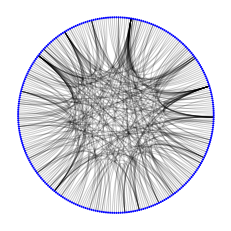

In [58]:
fig, ax = plt.subplots()
ax = nv.circos(
    S[1]
)